In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from pydataset import data
from math import sqrt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import evaluate

### 1. Load the tips dataset from either pydataset or seaborn.

In [55]:
df = data("tips")

In [56]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

In [57]:
x = df.total_bill
y = df.tip

In [58]:
baseline = y.mean()

In [59]:
df["baseline"] = y.mean()
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279


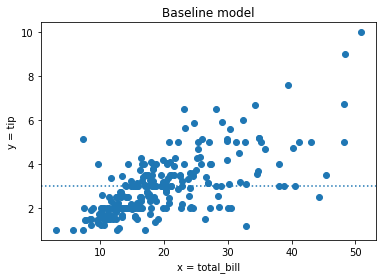

In [60]:
plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('Baseline model');

In [61]:
model = LinearRegression(normalize=True)

In [62]:
model.fit(df[['total_bill']], y)

LinearRegression(normalize=True)

In [63]:
df['yhat'] = model.predict(df[['total_bill']])

In [64]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822


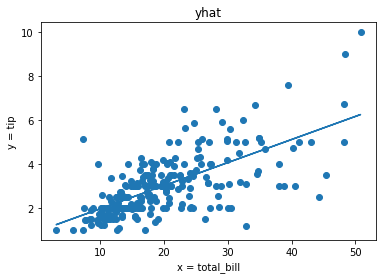

In [65]:
plt.scatter(x, y)
plt.plot(x, df.yhat)
plt.xlabel('x = total_bill')
plt.ylabel('y = tip')
plt.title('yhat');

### 3. Plot the residuals for the linear regression model that you made.

In [66]:
df['residual'] = y - df.yhat
df['baseline_residual'] = y - df.baseline

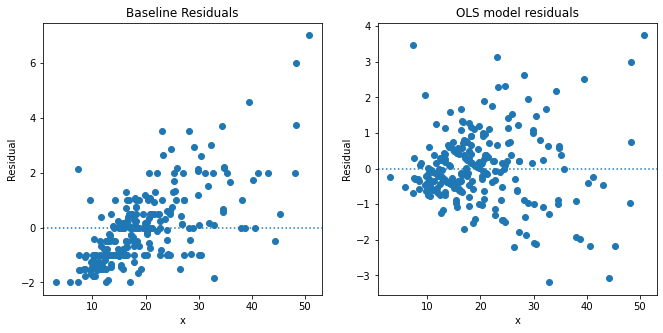

In [67]:
plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(x, df.baseline_residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(x, df.residual)
plt.axhline(y = 0, ls = ':')
plt.xlabel('x')
plt.ylabel('Residual')
plt.title('OLS model residuals');

### 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [68]:
# first calculate the square of residuals
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,total_bill,tip,sex,smoker,day,time,size,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,16.99,1.01,Female,No,Sun,Dinner,2,2.998279,2.704636,-1.694636,-1.988279,2.871792,3.953252
2,10.34,1.66,Male,No,Sun,Dinner,3,2.998279,2.006223,-0.346223,-1.338279,0.119870,1.790990
3,21.01,3.50,Male,No,Sun,Dinner,3,2.998279,3.126835,0.373165,0.501721,0.139252,0.251724
4,23.68,3.31,Male,No,Sun,Dinner,2,2.998279,3.407250,-0.097250,0.311721,0.009458,0.097170
5,24.59,3.61,Female,No,Sun,Dinner,4,2.998279,3.502822,0.107178,0.611721,0.011487,0.374203


In [69]:
SSE = df['residual^2'].sum()
print('SSE =', "{:.1f}".format(SSE))

SSE = 252.8


In [70]:
MSE = SSE/len(df)
print("MSE = ", "{:.1f}".format(MSE))

MSE =  1.0


In [71]:
RMSE = sqrt(MSE)
print("RMSE = ", "{:.1f}".format(RMSE))

RMSE =  1.0


In [72]:
MSE2 = mean_squared_error(y, df.yhat)
print("MSE2", MSE2) 

MSE2 1.036019442011377


In [76]:
ESS = sum((df.yhat - df.baseline)**2)
print("ESS", ESS)

ESS 212.42373319840434


In [78]:
TSS = ESS + SSE
print("TSS",TSS)

TSS 465.21247704918034


### 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [20]:
SSE_baseline = df['baseline_residual^2'].sum()
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

SSE Baseline = 465.2


In [21]:
MSE_baseline = SSE_baseline/len(df)
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

MSE baseline =  1.9


In [22]:
RMSE_baseline =  sqrt(MSE_baseline)
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))

RMSE baseline =  1.4


In [23]:
MSE2_baseline = mean_squared_error(y, df.baseline)
print("MSE2 baseline" ,MSE2_baseline)

MSE2 baseline 1.906608512496641


### 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [79]:
SSE_baseline > SSE

True

### 7. What is the amount of variance explained in your model?

In [25]:
df.baseline_residual.mean() - df.residual.mean()

-4.040483794537455e-16

### 8. Is your model better than the baseline model?

In [26]:
# yes the model is much better than the baseline

### 9. Create a file named evaluate.py that contains the following functions.

In [27]:
# saved as evaluate.py in my regression exercises folder

### 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [87]:
df = data("mpg")

In [88]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [89]:
x = df.displ
y = df.hwy

In [90]:
baseline = y.mean()

In [91]:
df["baseline"] = y.mean()

In [92]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171


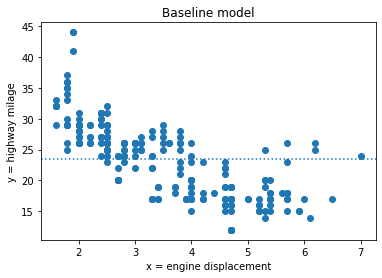

In [93]:
plt.scatter(x, y)
plt.axhline(y.mean(), ls = ':')
plt.xlabel('x = engine displacement')
plt.ylabel('y = highway milage')
plt.title('Baseline model');

In [94]:
model = LinearRegression(normalize=True)

In [95]:
model.fit(df[['displ']], y)

LinearRegression(normalize=True)

In [96]:
df['yhat'] = model.predict(df[['displ']])

In [97]:
df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002


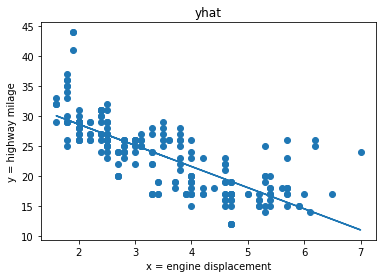

In [98]:
plt.scatter(x, y)
plt.plot(x, df.yhat)
plt.xlabel('x = engine displacement')
plt.ylabel('y = highway milage')
plt.title('yhat');

In [99]:
df["residual"] = y - df.yhat
df["baseline_residual"] = y - df.baseline

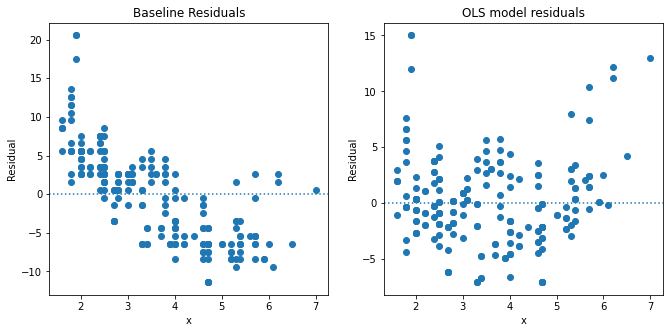

In [100]:
evaluate.plot_residual(df,"displ")

In [101]:
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat,residual,baseline_residual
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591,-0.342591,5.559829
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591,-0.342591,5.559829
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473,2.363527,7.559829
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473,1.363527,6.559829
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002,0.187998,2.559829


In [102]:
evaluate.get_residual_squared(df)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,baseline,yhat,residual,baseline_residual,residual^2,baseline_residual^2
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.440171,29.342591,-0.342591,5.559829,0.117369,30.911699
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,23.440171,29.342591,-0.342591,5.559829,0.117369,30.911699
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,23.440171,28.636473,2.363527,7.559829,5.586258,57.151015
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,23.440171,28.636473,1.363527,6.559829,1.859205,43.031357
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,23.440171,25.812002,0.187998,2.559829,0.035343,6.552725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize,23.440171,28.636473,-0.636473,4.559829,0.405098,20.792041
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize,23.440171,28.636473,0.363527,5.559829,0.132152,30.911699
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize,23.440171,25.812002,0.187998,2.559829,0.035343,6.552725
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize,23.440171,25.812002,0.187998,2.559829,0.035343,6.552725


In [103]:
SSE = evaluate.get_sse(df,"residual^2")

SSE = 3413.8


In [104]:
baseline_SSE = evaluate.get_sse(df,"baseline_residual^2")

SSE = 8261.7


In [105]:
MSE = evaluate.get_mse(df,SSE)

MSE =  14.6


In [106]:
baseline_MSE = evaluate.get_mse(df,baseline_SSE)

MSE =  35.3


In [107]:
RMSE = evaluate.get_rmse(MSE)

RMSE =  3.8


In [108]:
baseline_RMSE = evaluate.get_rmse(baseline_MSE)

RMSE =  5.9


In [109]:
MSE2 = evaluate.get_mse2(df,"hwy","yhat")

MSE2 14.589012858954984


In [110]:
baseline_SSE - SSE

4847.833384166925

In [112]:
baseline_SSE > SSE

True